In [298]:
import pandas as pd
import numpy as np
#import cudf
from sklearn.model_selection import GroupKFold
import matplotlib.pyplot as plt
pd.__version__

'1.3.4'

## Summary:
- We explored the data and saw the different raw features available in the dataset.
- We analzyed basic statistics of the raw features and saw long-tail distribution for categorical features (user, item, brand)
- Some categorical features (categories) have high occurances
- In general, we see that categorical features have variance in the target, which we can leverage to engineer more powerful features
  We shutdown the kernel

## 1 Exploring Dataset

In [299]:
data = pd.read_csv('2019-Nov.csv')

In [300]:
data.shape

(67501979, 9)

In [301]:
df = data[:round(len(data)/1000)].copy()
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [302]:
df.shape

(67502, 9)

## Create a Column Target

In [303]:
df['event_time']=pd.to_datetime(df['event_time'])
df['target']=0
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0


In [304]:
df['timestamp']=df['event_time'].dt.strftime('%m/%d/%Y')
df.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target,timestamp
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,11/01/2019
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,11/01/2019
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0,11/01/2019
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,11/01/2019
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,11/01/2019


In [305]:
df['day'] = df['event_time'].dt.day
df['month'] = df['event_time'].dt.month
df['year'] = df['event_time'].dt.year
df['ts_weekday'] = df['event_time'].dt.weekday
df['hour'] = df['event_time'].dt.hour
df.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target,timestamp,day,month,year,ts_weekday,hour
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,11/01/2019,1,11,2019,4,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,11/01/2019,1,11,2019,4,0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0,11/01/2019,1,11,2019,4,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,11/01/2019,1,11,2019,4,0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,11/01/2019,1,11,2019,4,0


In [306]:

df['target'] = df['event_type'].apply(lambda x: '1' if x == 'purchase' else 0)
df.isnull().sum()


event_time           0
event_type           0
product_id           0
category_id          0
category_code    22873
brand            10792
price                0
user_id              0
user_session         0
target               0
timestamp            0
day                  0
month                0
year                 0
ts_weekday           0
hour                 0
dtype: int64

In [307]:

cols = ['brand', 'user_session', 'category_code']

for col in cols:
    df['NA_' + col] = df[col].isna().astype(np.int8)
    df[col].fillna('UNKNOWN', inplace=True)


df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target,timestamp,day,month,year,ts_weekday,hour,NA_brand,NA_user_session,NA_category_code
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,11/01/2019,1,11,2019,4,0,0,0,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,11/01/2019,1,11,2019,4,0,0,0,0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0,11/01/2019,1,11,2019,4,0,0,0,1
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,11/01/2019,1,11,2019,4,0,0,0,0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,11/01/2019,1,11,2019,4,0,0,0,0


In [308]:
print("The persent of view, purchase and cart : \n",str(df['event_type'].value_counts(normalize =True)*100))
print("The persent of parchase: \n",df['target'].value_counts(normalize =True)*100)
print("The Number of costumer: \n",df['user_id'].drop_duplicates().shape)
print("unique user session: \n",df['user_session'].drop_duplicates().shape)



The persent of view, purchase and cart : 
 view        97.763029
purchase     1.260703
cart         0.976267
Name: event_type, dtype: float64
The persent of parchase: 
 0    98.739297
1     1.260703
Name: target, dtype: float64
The Number of costumer: 
 (14164,)
unique user session: 
 (16772,)


In [309]:
def plot_sparse(df,col):
    stats= df[[col, 'target']].groupby(col).agg(['count','mean','sum'])
    stats=stats.reset_index()
    stats.columns = [col, 'count' , 'mean', 'sum']
    stats_sort=stats['count'].value_counts().reset_index()
    stats_sort= stats_sort.sort_values('index')
    plt.figure(figsize=(15,4))
    plt.bar(stats_sort['index'].astype(str).values[0:20], stats_sort['count'].values[0:20])
    plt.title('Frequency of'+str(col))
    plt.xlabel('Number frequency')
    plt.ylabel('Frequency')
    

In [310]:
df['target']=df['target'].astype(int)
df['product_id']=df['product_id'].astype(object)

### We can observe following pattern:

- There are ~45000 products which appear only once in the dataset
- There are 1200000 users which appear only once in the dataset
- There are 350 brands which appears only once in the dataset
- There are 0 cat0, 0 cat1 and 0 cat2 which appear only once in the dataset The sparsity is important for understanding which features can be better used in a model. Product_id and User_id have many values which appear only once and the model is less able to learn a good patterns from them.
- On the other hand, brands, cat1, cat2 and cat3 have many observations and can be leveraged for prediction.

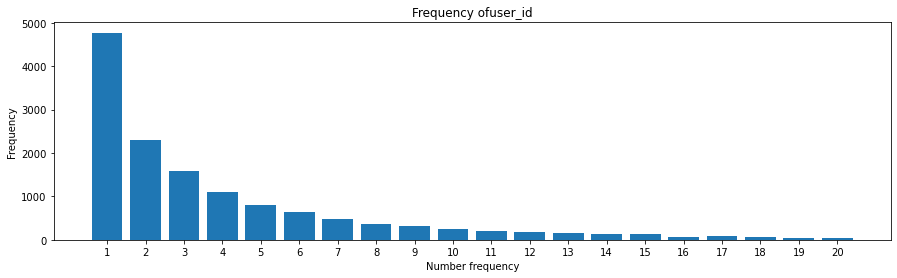

In [311]:
plot_sparse(df,'user_id')


In [312]:
df[['product_id', 'target']].groupby(['product_id']).agg(['count','mean','sum']).sort_values(('target', 'count'), ascending=False).head(10)

target              
            count      mean sum
product_id                     
1004856       716  0.046089  33
1004767       617  0.034036  21
1005115       581  0.037866  22
1004833       374  0.042781  16
1005105       371  0.032345  12
1004249       343  0.032070  11
4804056       332  0.054217  18
1002544       328  0.048780  16
1005160       303  0.016502   5
1004870       300  0.036667  11

In [313]:
df[['brand', 'target']].groupby(['brand']).agg(['count','mean','sum']).sort_values(('target', 'count'), ascending=False).head(10)

target               
          count      mean  sum
brand                         
UNKNOWN   10792  0.006486   70
samsung    7692  0.024181  186
apple      5662  0.026139  148
xiaomi     4881  0.015366   75
huawei     1408  0.014915   21
lucente     986  0.012170   12
sony        824  0.012136   10
oppo        818  0.022005   18
bosch       768  0.009115    7
cordiant    753  0.029216   22

In [314]:
def plot_top20(df, col):
    stats = df[[col, 'target']].groupby(col).agg(['count', 'mean', 'sum'])
    stats = stats.reset_index()
    stats.columns = [col, 'count', 'mean', 'sum']
    stats = stats.sort_values('count', ascending=False)
    fig, ax1 = plt.subplots(figsize=(15,4))
    ax2 = ax1.twinx()
    ax1.bar(stats[col].astype(str).values[0:20], stats['count'].values[0:20])
    ax1.set_xticklabels(stats[col].astype(str).values[0:20], rotation='vertical')
    ax2.plot(stats['mean'].values[0:20], color='red')
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Mean Target')
    ax1.set_ylabel('Frequency')
    ax1.set_xlabel(col)
    ax1.set_title('Top20 ' + col + 's based on frequency')

In [315]:
stats = df[['brand','user_id']].groupby(['brand']).agg(['count','mean','sum'])
stats=stats.reset_index()
stats

brand user_id                             
                 count          mean            sum
0      UNKNOWN   10792  5.357094e+08  5781375712289
1       a-case       8  5.444511e+08     4355608517
2       accord       1  5.426017e+08      542601681
3         acer     588  5.340021e+08   313993260991
4         aces       1  5.166677e+08      516667668
...        ...     ...           ...            ...
1408    zlatek       1  5.131997e+08      513199673
1409  zongshen       1  5.186410e+08      518641034
1410       zte      18  5.443081e+08     9797546275
1411      zubr      19  5.348735e+08    10162596878
1412      zuru       5  5.130163e+08     2565081660

[1413 rows x 4 columns]

/home/hicham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


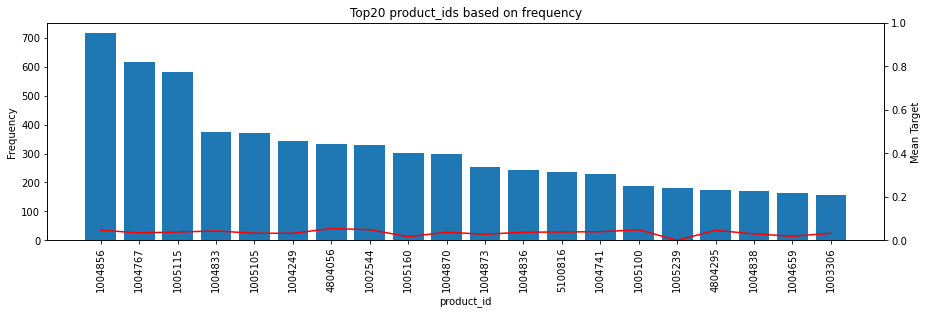

In [316]:
plot_top20(df,'product_id')

/home/hicham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


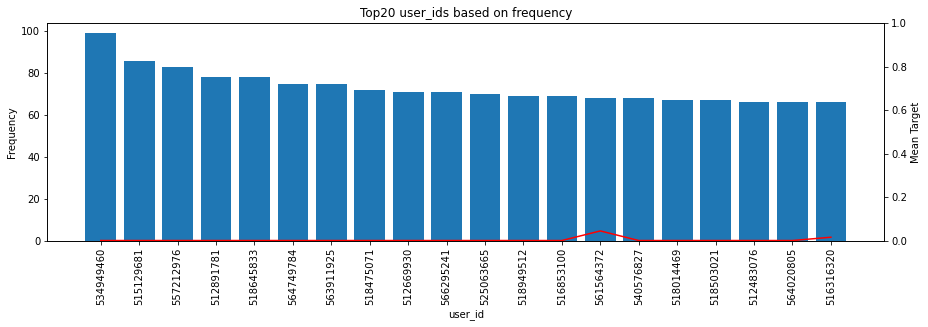

In [317]:
plot_top20(df,'user_id')

In [318]:
def plot_top20(df, col):
    stats = df[[col, 'target']].groupby(col).agg(['count', 'mean', 'sum'])
    stats = stats.reset_index()
    stats.columns = [col, 'count', 'mean', 'sum']
    stats = stats.sort_values('count', ascending=False)
    fig, ax1 = plt.subplots(figsize=(15,4))
    ax2 = ax1.twinx()
    ax1.bar(stats[col].astype(str).values[0:20], stats['count'].values[0:20])
    ax1.set_xticklabels(stats[col].astype(str).values[0:20], rotation='vertical')
    ax2.plot(stats['mean'].values[0:20], color='red')
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Mean Target')
    ax1.set_ylabel('Frequency')
    ax1.set_xlabel(col)
    ax1.set_title('Top20 ' + col + 's based on frequency')

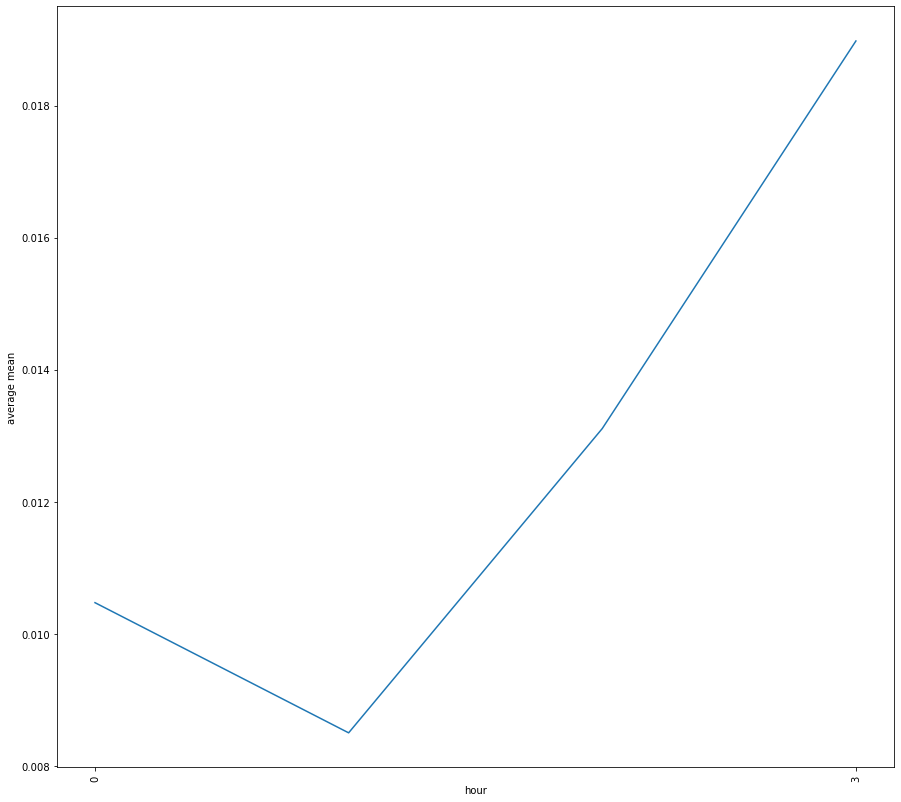

In [319]:
#df['date']= pd.to_datetime(df['timestamp']).dt.date
plt.figure(figsize=(15,14))
plt.plot(df[['hour','target']].groupby('hour').target.mean())
plt.ylabel('average mean')
plt.xlabel('hour')
plt.xticks(df[['hour','target']].groupby('hour').target.mean().index[::3],rotation ='vertical')
print('')

## 2 Preprocessing

In [320]:
#No messing Data
df.isna().sum()

event_time          0
event_type          0
product_id          0
category_id         0
category_code       0
brand               0
price               0
user_id             0
user_session        0
target              0
timestamp           0
day                 0
month               0
year                0
ts_weekday          0
hour                0
NA_brand            0
NA_user_session     0
NA_category_code    0
dtype: int64

#### Replace randomly 1% of the data with None

In [321]:
np.random.seed(42)
df.loc[np.random.random(df.shape[0])<0.01, 'price'] = None
df['price'].isna().mean()


0.00973304494681639

In [322]:
df_median= df[['brand','price']].groupby(['brand']).median().reset_index()
df_median.columns = ['brand','price_median_perbrand']
df=df.merge(df_median,how='left',on ='brand')
print(df.columns)
#df.drop('price_median_perbrandx', inplace=True)
df.head()

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'target',
       'timestamp', 'day', 'month', 'year', 'ts_weekday', 'hour', 'NA_brand',
       'NA_user_session', 'NA_category_code', 'price_median_perbrand'],
      dtype='object')


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target,timestamp,day,month,year,ts_weekday,hour,NA_brand,NA_user_session,NA_category_code,price_median_perbrand
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,11/01/2019,1,11,2019,4,0,0,0,0,189.970
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,11/01/2019,1,11,2019,4,0,0,0,0,223.995
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0,11/01/2019,1,11,2019,4,0,0,0,1,222.655
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,11/01/2019,1,11,2019,4,0,0,0,0,390.350
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,11/01/2019,1,11,2019,4,0,0,0,0,189.970


### We create an indicator column, when price was not available and then overwrite the missing values with the median.
- That is a demonstration of how we dill with Price messing

In [323]:


df['NA_price']= df[col].isna().astype(np.int8)

df.loc[df['price'].isna(), 'price'] = df.loc[df['price'].isna(), 'price_median_perbrand']
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target,...,day,month,year,ts_weekday,hour,NA_brand,NA_user_session,NA_category_code,price_median_perbrand,NA_price
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,...,1,11,2019,4,0,0,0,0,189.970,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,...,1,11,2019,4,0,0,0,0,223.995,0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0,...,1,11,2019,4,0,0,0,1,222.655,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,...,1,11,2019,4,0,0,0,0,390.350,0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,...,1,11,2019,4,0,0,0,0,189.970,0


In [324]:
df.drop(['price_median_perbrand'], axis = 1,inplace=True)

In [325]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target,timestamp,day,month,year,ts_weekday,hour,NA_brand,NA_user_session,NA_category_code,NA_price
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,11/01/2019,1,11,2019,4,0,0,0,0,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,11/01/2019,1,11,2019,4,0,0,0,0,0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0,11/01/2019,1,11,2019,4,0,0,0,1,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,11/01/2019,1,11,2019,4,0,0,0,0,0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,11/01/2019,1,11,2019,4,0,0,0,0,0


### We search all nan value in our price Colum

In [326]:
df.loc[df['price'].isna(), 'price'].value_counts(dropna =False)

NaN    2
Name: price, dtype: int64

### 3 Feature Engineering - Categorical
#### 3.1  Combining Categories / Cross Columns

### Theory
* Combining Categories (CC)* is a simple, powerful technique, but often undervalued. We will use this strategy in other feature engineering techniques, as well, and will introduce its value in a simple example.

In some datasets, categories by itself provide no information to predict the target. But if we combine multiple categories, together, then we can indentify patterns.

For example, we have the following categories:

Weekday
Hour of the day
Each of them independently has no significant pattern in the dataset. If we combine them with Weekday_HourOfTheDay, then we can observe some strong behavior for certainn times on the weekend

Decision Trees determine the split in the dataset on single features. If each categorical feature by itself does not provide the information gain, then Decision Trees cannot find a good split. If we provide a combined categorical feature, the Decision Tree can easier split the dataset.
Combining categories, also called Cross Column or Cross Product, is used in the Wide [Deep Architecture by Google](https://arxiv.org/abs/1606.07792) and is implemented in [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/feature_column/crossed_column)

In [327]:
df.describe()

,category_id,price,user_id,target,day,month,year,ts_weekday,hour,NA_brand,NA_user_session,NA_category_code,NA_price
count,6.750200e+04,67500.000000,6.750200e+04,67502.000000,67502.0,67502.0,67502.0,67502.0,67502.000000,67502.000000,67502.0,67502.000000,67502.0
mean,2.057980e+18,283.890753,5.354385e+08,0.012607,1.0,11.0,2019.0,4.0,1.619908,0.159877,0.0,0.338849,0.0
std,1.974307e+16,345.972895,2.028077e+07,0.111572,0.0,0.0,0.0,0.0,0.926260,0.366494,0.0,0.473322,0.0
min,2.053014e+18,0.000000,2.752567e+08,0.000000,1.0,11.0,2019.0,4.0,0.000000,0.000000,0.0,0.000000,0.0
25%,2.053014e+18,66.510000,5.159117e+08,0.000000,1.0,11.0,2019.0,4.0,1.000000,0.000000,0.0,0.000000,0.0
50%,2.053014e+18,166.410000,5.313648e+08,0.000000,1.0,11.0,2019.0,4.0,2.000000,0.000000,0.0,0.000000,0.0
75%,2.053014e+18,352.110000,5.551324e+08,0.000000,1.0,11.0,2019.0,4.0,2.000000,0.000000,0.0,1.000000,0.0
max,2.180737e+18,2574.070000,5.663039e+08,1.000000,1.0,11.0,2019.0,4.0,3.000000,1.000000,0.0,1.000000,0.0


In [328]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target,timestamp,day,month,year,ts_weekday,hour,NA_brand,NA_user_session,NA_category_code,NA_price
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,11/01/2019,1,11,2019,4,0,0,0,0,0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,11/01/2019,1,11,2019,4,0,0,0,0,0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0,11/01/2019,1,11,2019,4,0,0,0,1,0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,11/01/2019,1,11,2019,4,0,0,0,0,0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,11/01/2019,1,11,2019,4,0,0,0,0,0


In [329]:
def explore_cat(df, cats):
    df_agg = df[cats + ['target']].groupby(cats).agg(['mean', 'count']).reset_index()
    df_agg.columns = cats + ['mean', 'count']
    print(df_agg.sort_values('count', ascending=False).head(20))
    
cats = ['product_id', 'user_id']  
explore_cat(df, cats)

       product_id    user_id      mean  count
12636     1801881  557746614  0.280000     25
475       1002629  516427074  0.000000     23
28474    14700402  512980414  0.000000     22
33415    19200005  543689735  0.045455     22
4673      1004833  557760558  0.227273     22
18354     4804056  538178630  0.142857     21
28859    14701435  566215074  0.000000     19
10225     1200957  556325945  0.111111     18
20713     5800993  563911925  0.000000     17
31386    16700794  546273062  0.062500     16
30513    15700176  515129681  0.000000     16
12608     1801881  516426931  0.200000     15
3807      1004767  522352077  0.066667     15
16897     4100129  516426931  0.142857     14
16675     3900002  537500919  0.214286     14
18265     4804056  513052669  0.142857     14
20153     5400799  566297892  0.000000     14
27521    13201002  527190401  0.000000     14
30531    15700176  542317384  0.000000     14
35522    26017911  519651706  0.000000     14


In [330]:

    
cats = ['user_id', 'brand']  
explore_cat(df, cats)

         user_id     brand      mean  count
566    512483076   UNKNOWN  0.000000     60
7768   517099175   UNKNOWN  0.000000     58
7265   516559137   UNKNOWN  0.000000     48
23619  564749784   UNKNOWN  0.000000     47
15486  540576827   redmond  0.000000     46
1911   512980414   UNKNOWN  0.000000     44
22251  561564372   UNKNOWN  0.000000     44
23246  564020805   UNKNOWN  0.000000     42
4053   514119888  decoroom  0.051282     39
2424   513198013    xiaomi  0.000000     39
7967   517412536   samsung  0.000000     35
5683   515129681   UNKNOWN  0.000000     35
23168  563911925   UNKNOWN  0.000000     35
5333   514921446   UNKNOWN  0.000000     34
24906  566263856   samsung  0.000000     34
25999  566295241   UNKNOWN  0.000000     34
2019   513029041   UNKNOWN  0.000000     34
10734  521908136   samsung  0.000000     33
18449  550177661    xiaomi  0.000000     32
9419   518960638   kitfort  0.000000     32


In [331]:
    
cats = ['event_time', 'year']  
explore_cat(df, cats)

                     event_time  year      mean  count
10118 2019-11-01 03:05:59+00:00  2019  0.000000     27
10395 2019-11-01 03:10:36+00:00  2019  0.000000     23
9817  2019-11-01 03:00:58+00:00  2019  0.043478     23
10373 2019-11-01 03:10:14+00:00  2019  0.000000     22
10121 2019-11-01 03:06:02+00:00  2019  0.045455     22
10280 2019-11-01 03:08:41+00:00  2019  0.045455     22
10144 2019-11-01 03:06:25+00:00  2019  0.045455     22
10244 2019-11-01 03:08:05+00:00  2019  0.047619     21
10307 2019-11-01 03:09:08+00:00  2019  0.000000     21
10022 2019-11-01 03:04:23+00:00  2019  0.047619     21
9889  2019-11-01 03:02:10+00:00  2019  0.047619     21
10010 2019-11-01 03:04:11+00:00  2019  0.047619     21
10342 2019-11-01 03:09:43+00:00  2019  0.000000     20
10034 2019-11-01 03:04:35+00:00  2019  0.000000     20
10306 2019-11-01 03:09:07+00:00  2019  0.000000     20
9713  2019-11-01 02:59:14+00:00  2019  0.050000     20
10359 2019-11-01 03:10:00+00:00  2019  0.000000     20
10270 2019

## 3.2. Categorify
### Theory
*Categorifying* is required for using categorical features in deep learning models with Embedding layers. An Embedding layer encodes the category into a hidden latent vector with a smaller dimension.

Categorical features can be from datatype String or Integer. The Embedding layer requires that categorical features are continoues, positive Integers from 0 to |C| (number of unique category values).

There are 164453 unique product values but the ProductIDs range from 1000894 to 100144608.

In [332]:
cat='product_id'

In [333]:
df[cat].unique()

array([1003461, 5000088, 17302664, ..., 15700059, 4201541, 28100860],
      dtype=object)

Using factorize creates continous Integers from a categorical fateature.



In [334]:
codes, uniques = df[cat].factorize()
codes

array([    0,     1,     2, ...,  4677, 16405,  7868])

In [335]:
uniques

Int64Index([ 1003461,  5000088, 17302664,  3601530,  1004775,  1306894,
             1306421, 15900065, 12708937,  1004258,
            ...
             2501068, 19000878, 26402632, 32801014, 48200396, 45600164,
             3900468, 15700059,  4201541, 28100860],
           dtype='int64', length=16406)

Finally, we can prevent overfitting for low frequency categories. Categories with low frequency can be grouped together to an new category called 'other'. In the previous exercise we learned that it is powerful to combine categorical features together to create a new feature. However, combining categories increases the cardinality of the new feature and the number of obersations per category will decrease. Therefore, we can apply a treshhold to group all categories with lower frequency count to the the new category.

In addition, categories, which occure in the validation dataset and do not occur in the trainint dataset, should be mapped to the 'other' category as well.

We use in our example the categoryIds 0 or 1 for a placeholder for the low frequency and unkown category. Then our function is independent of the cardinality of the categorical feature and we do not keep records of the cardinality to know the low frequency/unkown category.

In our dataset, we see that multiple product_ids occure only once in the training dataset. Our model would overfit to these low frequent categories.

In [336]:
freq=df[cat].value_counts()

In [337]:
freq = freq.reset_index()
freq.columns = [cat, 'count']
freq = freq.reset_index()


In [338]:
#create a new column
freq.columns = [cat + '_Categorify', cat, 'count']

In [339]:
freq_filtered = freq[freq['count']>5]
freq_filtered

,product_id_Categorify,product_id,count
0,0,1004856,716
1,1,1004767,617
2,2,1005115,581
3,3,1004833,374
4,4,1005105,371
...,...,...,...
2313,2313,26400281,6
2314,2314,1003934,6
2315,2315,3200388,6
2316,2316,5100467,6


In [340]:
freq_filtered[cat + '_Categorify'] = freq_filtered[cat + '_Categorify']+1
freq_filtered

/home/hicham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,product_id_Categorify,product_id,count
0,1,1004856,716
1,2,1004767,617
2,3,1005115,581
3,4,1004833,374
4,5,1005105,371
...,...,...,...
2313,2314,26400281,6
2314,2315,1003934,6
2315,2316,3200388,6
2316,2317,5100467,6


In [341]:
freq_filtered = freq_filtered.drop('count', axis=1)
freq_filtered


,product_id_Categorify,product_id
0,1,1004856
1,2,1004767
2,3,1005115
3,4,1004833
4,5,1005105
...,...,...
2313,2314,26400281
2314,2315,1003934
2315,2316,3200388
2316,2317,5100467


In [342]:
df = df.merge(freq_filtered, how='left', on=cat)
df[cat + '_Categorify'] = df[cat + '_Categorify'].fillna(0)
print(df.shape)
df.head()

(67502, 21)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target,...,day,month,year,ts_weekday,hour,NA_brand,NA_user_session,NA_category_code,NA_price,product_id_Categorify
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,...,1,11,2019,4,0,0,0,0,0,2149.0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,...,1,11,2019,4,0,0,0,0,0,217.0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0,...,1,11,2019,4,0,0,0,1,0,0.0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,...,1,11,2019,4,0,0,0,0,0,0.0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,...,1,11,2019,4,0,0,0,0,0,687.0


In [343]:
df['product_id_Categorify'].min(), df['product_id_Categorify'].max(), df['product_id_Categorify'].drop_duplicates().shape


(0.0, 2318.0, (2319,))

We need to apply the categorify to our validation and test sets.

In [344]:
#df_valid = df_valid.merge(freq_filtered, how='left', on=cat)
#df_valid[cat + '_Categorify'] = df_valid[cat + '_Categorify'].fillna(0)

#df_test = df_test.merge(freq_filtered, how='left', on=cat)
#df_test[cat + '_Categorify'] = df_test[cat + '_Categorify'].fillna(0)

## Summary
- Categorify is important to enable deep learning models to use categorical features
- Categorify can significantly reduce the dataset size by tranforming categorical features from String datatypes to Integer datatypes
- Categorify can prevent overfitting by grouping categories with low frequency into one category together

## Practice
### Now, it is your turn

# ToDo:

- Categorify the category features brand
- Apply a frequency treshhold of minimum 20
- Map low frequency categories to the id=0
- Map unkown categories to the id=1 in the validation and test set
## Question:

- How many data points have an unknown category in the test dataset?
- How many data points have a low frequency category in the test dataset?
- How many data points have a low frequency category in the training dataset?

In [345]:
cat1= 'brand'
freq1= df[cat1].value_counts()
freq1 =freq1.reset_index()
freq1.columns = [cat1, 'count']


freq1

,brand,count
0,UNKNOWN,10792
1,samsung,7692
2,apple,5662
3,xiaomi,4881
4,huawei,1408
...,...,...
1408,orium,1
1409,jkexer,1
1410,ciaobimbi,1
1411,rozenbal,1


In [346]:
freq1 =freq1.reset_index()
freq1.columns = [cat1+'_Categorify',cat1,'count']

In [347]:
freq1.head()

,brand_Categorify,brand,count
0,0,UNKNOWN,10792
1,1,samsung,7692
2,2,apple,5662
3,3,xiaomi,4881
4,4,huawei,1408


In [348]:
freq_filtered1=freq1[freq1['count']>=20]
freq_filtered1[cat1+'_Categorify']=freq_filtered1[cat1+'_Categorify']+1
freq_filtered1 = freq_filtered1.drop('count', axis=1)
df= df.merge(freq_filtered1,how ='left', on = cat1)

df.head()

/home/hicham/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target,...,month,year,ts_weekday,hour,NA_brand,NA_user_session,NA_category_code,NA_price,product_id_Categorify,brand_Categorify
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,...,11,2019,4,0,0,0,0,0,2149.0,4.0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,...,11,2019,4,0,0,0,0,0,217.0,41.0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0,...,11,2019,4,0,0,0,1,0,0.0,190.0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,...,11,2019,4,0,0,0,0,0,0.0,11.0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,...,11,2019,4,0,0,0,0,0,687.0,4.0


In [349]:
df[cat1+'_Categorify']= df[cat1+'_Categorify'].fillna(0)

In [350]:
df.shape

(67502, 22)

## Optimization
- we define a Function for train, test and validationset


In [351]:
def categorify(df_train, df_valid, df_test, cat, freq_treshhold=20, unkown_id=1, lowfrequency_id=0):
    freq = df_train[cat].value_counts()
    freq = freq.reset_index()
    freq.columns = [cat, 'count']
    freq = freq.reset_index()
    freq.columns = [cat + '_Categorify', cat, 'count']
    freq[cat + '_Categorify'] = freq[cat + '_Categorify']+2
    freq.loc[freq['count']<freq_treshhold, cat + '_Categorify'] = lowfrequency_id
    
    freq = freq.drop('count', axis=1)
    df_train = df_train.merge(freq, how='left', on=cat)
    df_train[cat + '_Categorify'] = df_train[cat + '_Categorify'].fillna(unkown_id)
    
    df_valid = df_valid.merge(freq, how='left', on=cat)
    df_valid[cat + '_Categorify'] = df_valid[cat + '_Categorify'].fillna(unkown_id)
    
    df_test = df_test.merge(freq, how='left', on=cat)
    df_test[cat + '_Categorify'] = df_test[cat + '_Categorify'].fillna(unkown_id)

### 3.3. Target Encoding
# Theory
- *Target Encoding (TE)* calculates the statistics from a target variable grouped by the unique values of one or more categorical features.

- For example in a binary classification problem, it calculates the probability that the target is true for each category value - a simple mean.

In [352]:
df_train = data[:round(len(data)/1000)].copy()
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target,...,month,year,ts_weekday,hour,NA_brand,NA_user_session,NA_category_code,NA_price,product_id_Categorify,brand_Categorify
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,...,11,2019,4,0,0,0,0,0,2149.0,4.0
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,...,11,2019,4,0,0,0,0,0,217.0,41.0
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0,...,11,2019,4,0,0,0,1,0,0.0,190.0
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,...,11,2019,4,0,0,0,0,0,0.0,11.0
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,...,11,2019,4,0,0,0,0,0,687.0,4.0


In [353]:
cat= 'brand'

In [354]:
#That give us the probability of purchasing product, we used target and the mean of this trget

te = df[[cat,'target']].groupby(cat).mean()
print(te.head())
te= te.reset_index()
print(te.head())

te.columns = [cat,'TE_'+cat]

te

           target
brand            
UNKNOWN  0.006486
a-case   0.000000
accord   0.000000
acer     0.013605
aces     0.000000
     brand    target
0  UNKNOWN  0.006486
1   a-case  0.000000
2   accord  0.000000
3     acer  0.013605
4     aces  0.000000


,brand,TE_brand
0,UNKNOWN,0.006486
1,a-case,0.000000
2,accord,0.000000
3,acer,0.013605
4,aces,0.000000
...,...,...
1408,zlatek,0.000000
1409,zongshen,0.000000
1410,zte,0.000000
1411,zubr,0.000000


In [355]:
df= df.merge(te,how ='left', on = cat)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target,...,year,ts_weekday,hour,NA_brand,NA_user_session,NA_category_code,NA_price,product_id_Categorify,brand_Categorify,TE_brand
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,...,2019,4,0,0,0,0,0,2149.0,4.0,0.015366
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,...,2019,4,0,0,0,0,0,217.0,41.0,0.000000
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0,...,2019,4,0,0,0,1,0,0.0,190.0,0.000000
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,...,2019,4,0,0,0,0,0,0.0,11.0,0.006859
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,...,2019,4,0,0,0,0,0,687.0,4.0,0.015366


## Similarly, we can apply Target Encoding to a group of categorical features.

In [356]:
te = df[['brand', 'month', 'target']].groupby(['brand', 'month']).mean()
te

,,target
brand,month,
UNKNOWN,11,0.006486
a-case,11,0.000000
accord,11,0.000000
acer,11,0.013605
aces,11,0.000000
...,...,...
zlatek,11,0.000000
zongshen,11,0.000000
zte,11,0.000000


In [357]:
te = te.reset_index()
te.columns = ['brand', 'month', 'TE_brand_month']

df.merge(te, how='left', left_on=['brand', 'month'], right_on=['brand', 'month']).head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,target,...,ts_weekday,hour,NA_brand,NA_user_session,NA_category_code,NA_price,product_id_Categorify,brand_Categorify,TE_brand,TE_brand_month
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,...,4,0,0,0,0,0,2149.0,4.0,0.015366,0.015366
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,...,4,0,0,0,0,0,217.0,41.0,0.000000,0.000000
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,UNKNOWN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,0,...,4,0,0,0,1,0,0.0,190.0,0.000000,0.000000
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,...,4,0,0,0,0,0,0.0,11.0,0.006859,0.006859
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,...,4,0,0,0,0,0,687.0,4.0,0.015366,0.015366


Target Encoding creates a new features, which can be used by the model for training. The advantage of Target Encoding is, that it process the categorical features and makes them easier accessible to the model during training and validation.

Tree-based model requires to create a split for each categorical value (depending on the exact model). Target Encoding saves to create many splits for the model. In particular, when applying Target Encoding to multiple columns, it reduces significantly the number of splits. The model can directly operate on the probablities/averages and creates a split based on them.
Another advantage is, that some boosted-tree libraries, such as XGBoost, cannot handle categorical features. The library requires to hot-n encode them. Categorical features with large cardinality (e.g. >100) are inefficient to store as hot-n.

Deep learning models often apply Embedding Layers to categorical features. Embedding layer can overfit quickly and categorical values with low frequencies have ony a few gradient descent updates and can memorize the training data.

In [358]:
df[[cat, 'target']].groupby(cat).agg(['mean', 'count'])

target       
              mean  count
brand                    
UNKNOWN   0.006486  10792
a-case    0.000000      8
accord    0.000000      1
acer      0.013605    588
aces      0.000000      1
...            ...    ...
zlatek    0.000000      1
zongshen  0.000000      1
zte       0.000000     18
zubr      0.000000     19
zuru      0.000000      5

[1413 rows x 2 columns]

In [359]:
dd = df[[cat, 'target']].groupby(cat).agg(['mean', 'count']).reset_index()['target']['count']
dd.head()

0    10792
1        8
2        1
3      588
4        1
Name: count, dtype: int64

In [360]:
#plt.bar(dd.groupby('count').count().index.to_array(), dd.groupby('count').count().to_array())
#plt.xlim(0,50)

In [361]:
cat ='brand'

print("mean Global", df2['target'].mean())
print("mean of the Categorie")
df2[[cat,'target']].groupby(cat).mean()

mean Global 0.0
mean of the Categorie


,target
brand,
a-case,0.0
accord,0.0
acer,0.0
aces,0.0
acm,0.0
...,...
zlatek,0.0
zongshen,0.0
zte,0.0
